In [47]:
import praw
import nltk
from nltk.corpus import stopwords
import string
import operator

# initialize reddit class
# api key and secret for nbabot1 stored in praw.ini file located in .config file
reddit = praw.Reddit("nbabot1", user_agent="script by u/Prestigious_Juice_97")

# create dictionary to hold number of occurances in submissions
term_count = {}

#create list of stop words to avoid counting
punc = list(string.punctuation)
filler_words = ["[Post", "Game", "Thread]", 
"i", "would", "really", "like", "team", "got", "get", "he'","he", "the", "think", 
"still", "they", "i'm", "it", "if", "even", "much", "gonna", "going", "well", "", 
"play", "played", "game", "know", "game.", "playing", "see", "one"]
stop = stopwords.words("english") + punc + filler_words
# iterate through top game threads of the month
for submission in reddit.subreddit("nba").search(query="[Post Game Thread]",sort="relevance", time_filter="month", limit=1):
    # parse through title first
    for term in submission.title.split(" "):
        if term not in stop:
            term_count[term] = 1 + term_count.get(term, 0)
    # parse through comments in each submission and use queue to parse through comment replies
    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():
        for term in comment.body.split(" "):
            if term.lower() not in stop:
                term_count[term] = 1 + term_count.get(term, 0)



res = dict(sorted(term_count.items(), key=operator.itemgetter(1), reverse=True)[:20])
print(res)






{'France': 100, 'Wemby': 58, 'Germany': 53, 'better': 39, 'US': 36, 'good': 36, 'best': 33, 'bad': 31, 'USA': 30, 'Gobert': 30, 'medal': 29, 'refs': 29, '2': 27, 'Yabusele': 27, 'Franz': 26, 'players': 25, '3': 24, 'Canada': 24, 'least': 23, 'last': 23}


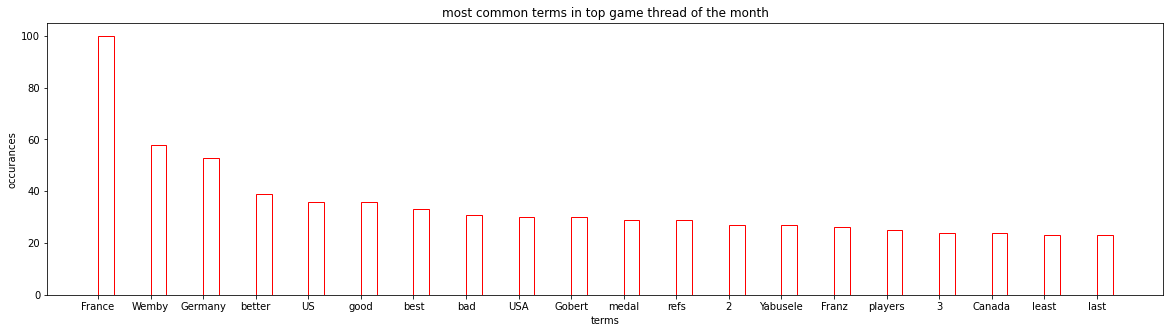

In [53]:
import matplotlib.pyplot as plt

terms = list(res.keys())
values = list(res.values())

fig = plt.figure(figsize= (20, 5))

# create bar graph
plt.bar(terms, values, edgecolor="red", width = 0.3, fill=False, align="edge")
plt.xlabel("terms")
plt.ylabel("occurances")
plt.title("most common terms in top game thread of the month")
plt.show()